In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
T = 100.0
dt = 0.02
N = int(T/dt)+1
t = np.linspace(0.0, T, N)
tchallenge = np.arange(0., T, dt)

### Challenge 1

Write code in 2nd cell using numpy.arange instead of linspace.
Need to increase T by dt in order to get the right size:

In [14]:
T = 100.0
dt = 0.02
N = int(T/dt)+1
tchallenge = np.arange(0., T+dt, dt)

Check to see that the "grids" are the same size:

In [16]:
len(tchallenge) == len(t)

True

Moving forward with the problem:

In [30]:
#initial conditions:
z0 = 100. #altitude
b0 = 0.5  #upward velocity resulting from gust
zt = 100. #mean height
g = 9.81  #acceleration due to gravity

u = np.array([z0, b0])

# initialize an array to hold the changing elevation values:
z = np.zeros(N) 
z[0] = z0  #sets first elevation value to initial elevation

Now step through the time grid and record solutions:

This is an interesting way to do this, u is replaced by u + dt x f(t) everytime through the loop.

In [31]:
#time-loop using Euler's Method:
for n in range(1,N):
    u = u + dt*np.array([u[1], g*(1-u[0]/zt)])
    z[n] = u[0]

Plotting:

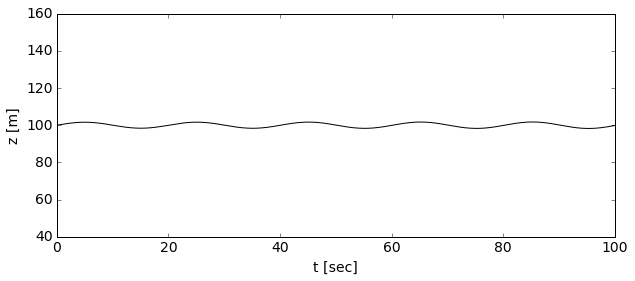

In [32]:
plt.figure(figsize=(10,4)) #sets plot size  
plt.ylim(40,160)           #y-axis plot limits
plt.tick_params(axis='both', labelsize=14) #increase font size for ticks
plt.xlabel('t [sec]', fontsize=14) #xlabel
plt.ylabel('z [m]', fontsize=14) #ylabel
plt.plot(t,z, 'k-')